In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import random
import seaborn as sns
import warnings

from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.datasets import make_circles, make_blobs
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.manifold import MDS
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

py.init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

RS = 42  # Random State for reproducible results
random.seed(RS)

<center><h3>Supervised Learning</h3></center>
<center><h4>kNN</h4></center>

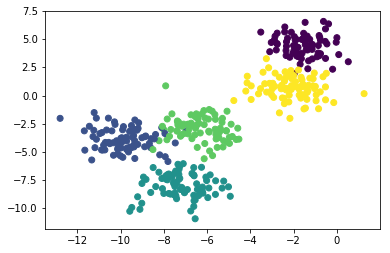

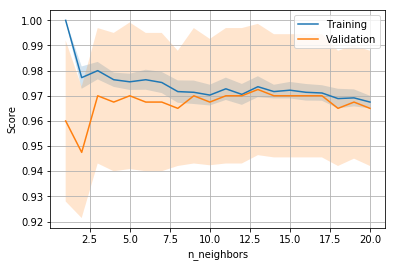

In [2]:
X_blobs, y_blobs = make_blobs(n_samples=400, centers=5, random_state=1)
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs)
plt.show()

k_vals = list(range(1, 21))
train_score, val_score = validation_curve(
    KNeighborsClassifier(), X_blobs, y_blobs, 'n_neighbors', k_vals, cv=10, n_jobs=-1
)

def plot_with_err(x, data, **kwargs):
    """
    Taken from mlcourse.ai
    """
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, np.clip(mu - std, 0, 1), np.clip(mu + std, 0, 1), edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)


plot_with_err(k_vals, train_score, label='Training')
plot_with_err(k_vals, val_score, label='Validation')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

<center><h4>Linear Regression</h4></center>

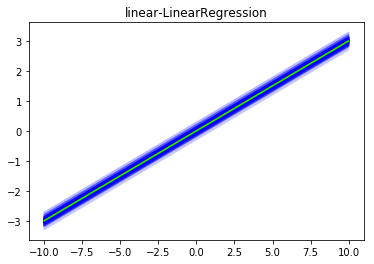

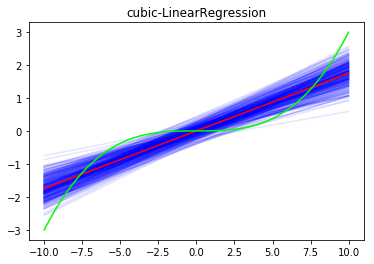

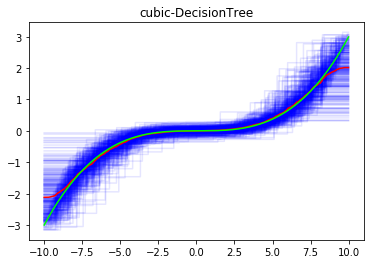

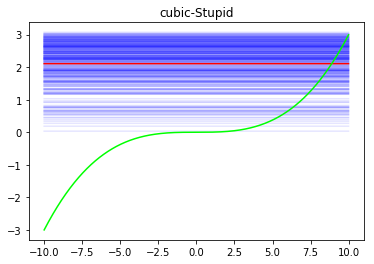

In [3]:
np.random.seed(RS)
T = 300
X = np.arange(-10, 10, 0.01)
X_reshaped = X.reshape(-1, 1)

fun = 4*[None]
fun[0] = lambda x: 0.3*x 
fun[1] = lambda x: 0.003*x**3
fun[2] = lambda x: 0.003*x**3
fun[3] = lambda x: 0.003*x**3

polynomial_features = PolynomialFeatures(degree=15)
lin_reg = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", lin_reg)])

class stupid_model:
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        self.data = y_train
    
    def predict(self, X):
        ans = np.full((X.shape[0],1), np.max(y_train))
        return ans

    
models = [lin_reg, lin_reg, DecisionTreeRegressor(), stupid_model()]

titles = ['linear-LinearRegression', 'cubic-LinearRegression', 'cubic-DecisionTree', 'cubic-Stupid']

np.random.seed(33)

for i in range(4):
    Mean = np.zeros_like(X_reshaped)
    for _ in range(T):
        x_train = np.random.choice(X, size=15).reshape(-1, 1)
        y_train = fun[i](x_train) + np.random.normal(scale=0.1)
        model = models[i]
        model.fit(x_train, y_train)
        y_pred = model.predict(X_reshaped)
        Mean += y_pred.reshape(-1, 1)
        plt.plot(X, y_pred, c='blue', alpha=0.1)
    plt.plot(X, Mean / T, c='red')
    plt.plot(X, fun[i](X), c='lime')
    plt.title(titles[i])
    plt.show()

<center><h3>Unsupervised Learning</h3></center>
<center><h4>MDS</h4></center>

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']

Shapes:
(150, 4)
(150,)

First 5 instances:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


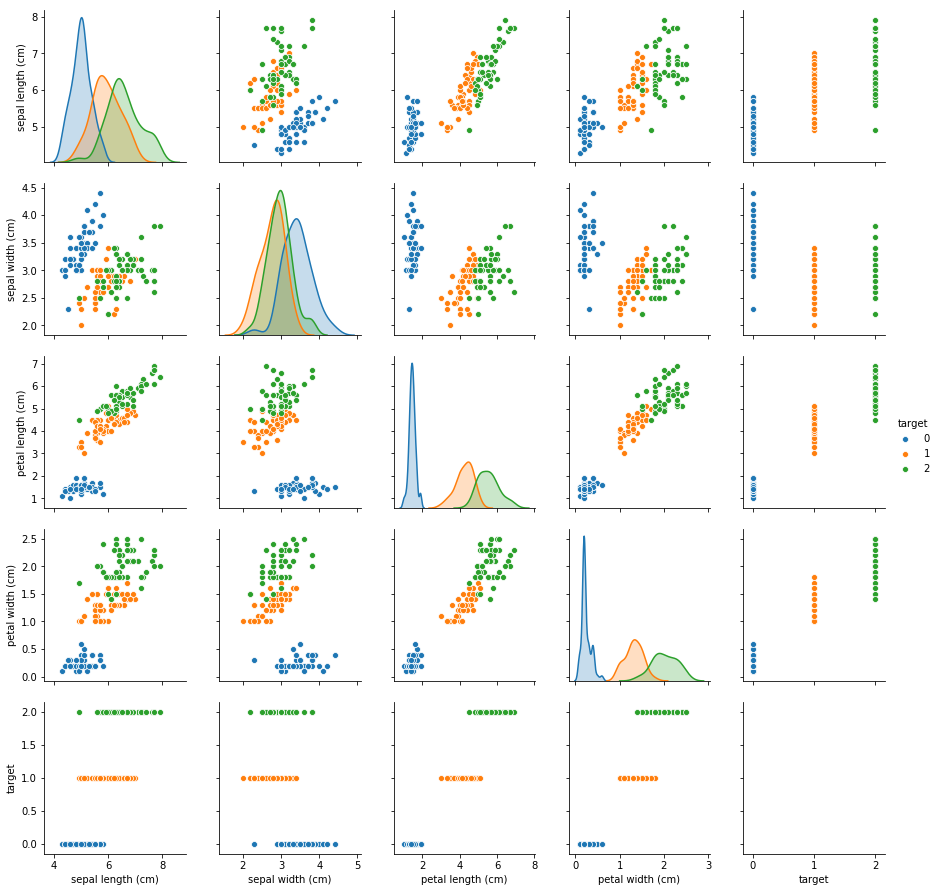

In [4]:
data = load_iris()
X = data.data
y = data.target

print('Features:', data.feature_names)
print('Labels:', data.target_names)
print()

print('Shapes:')
print(X.shape)
print(y.shape)
print()

print('First 5 instances:')
print(X[:5])
print(y[:5])

X_setosa = X[:50]
X_versicolor = X[50:100]
X_virginica = X[100:150]

left = [0, 50, 100]
right = [50, 100, 150]
colors = ['red', 'green', 'blue']
labels = ['setosa', 'versicolor', 'virginica']

df = pd.DataFrame(X)
df.columns = data.feature_names
df['target'] = y
df.head()

sns.pairplot(df, hue='target');

In [5]:
def my_plot_1d(X, method='plotly'):
    if method == 'plotly':
        traces = []
        y = np.zeros(50)
        for i in range(3):
            X_cur = X[left[i] : right[i]]
            trace = go.Scatter(
                x=X_cur[:, 0],
                y=y,
                mode='markers',
                marker=dict(
                    color=colors[i],
                    opacity=0.6
                ),
                name=labels[i]
            )
            traces.append(trace)
        fig = go.Figure(data=traces)
        py.iplot(fig)    
    elif method == 'matplotlib':
        ax = plt.axes()
        y = np.zeros(50)
        for i in range(3):
            X_cur = X[left[i] : right[i]]
            ax.scatter(X_cur[:,0], y = np.zeros(50), c=colors[i], label=labels[i], alpha=0.6)
        ax.legend()
        plt.show()
    else:
        raise ValueError('`method` should be either `plotly` or `matplotlib`')

        
def my_plot_2d(X, method='plotly'):
    if method == 'plotly':
        traces = []
        for i in range(3):
            X_cur = X[left[i] : right[i]]
            trace = go.Scatter(
                x=X_cur[:, 0],
                y=X_cur[:, 1],
                mode='markers',
                marker=dict(
                    color=colors[i],
                    opacity=0.6
                ),
                name=labels[i]
            )
            traces.append(trace)
        fig = go.Figure(data=traces)
        py.iplot(fig)    
    elif method == 'matplotlib':
        ax = plt.axes()
        for i in range(3):
            X_cur = X[left[i] : right[i]]
            ax.scatter(X_cur[:,0], X_cur[:,1], c=colors[i], label=labels[i], alpha=0.6)
        ax.legend()
        plt.show()
    else:
        raise ValueError('`method` should be either `plotly` or `matplotlib`')


def my_plot_3d(X, method='plotly'):
    if method == 'plotly':
        traces = []
        for i in range(3):
            X_cur = X[left[i] : right[i]]
            trace = go.Scatter3d(
                x=X_cur[:, 0],
                y=X_cur[:, 1],
                z=X_cur[:, 2],
                mode='markers',
                marker=dict(
                    color=colors[i],
                    opacity=0.6
                ),
                name=labels[i]
            )
            traces.append(trace)
        fig = go.Figure(data=traces)
        py.iplot(fig)    
    elif method == 'matplotlib':
        ax = plt.axes(projection='3d')
        for i in range(3):
            X_cur = X[left[i] : right[i]]
            ax.scatter3D(X_cur[:,0], X_cur[:,1], X_cur[:,2], c=colors[i], label=labels[i], alpha=0.6)
        ax.legend()
        plt.show()
    else:
        raise ValueError('`method` should be either `plotly` or `matplotlib`')


def my_plot(X, method='plotly'):
    if X.ndim == 1 or X.shape[1] == 1:
        my_plot_1d(X, method)
    elif X.shape[1] == 2:
        my_plot_2d(X, method)
    elif X.shape[1] == 3:
        my_plot_3d(X, method)
    else:
        raise ValueError('X must be 2d-array with 1, 2 or 3 columns')

In [6]:
mds = 4 * [None]
X_mds = 4 * [None]

for i in range(3, 0, -1):
    mds[i] = MDS(n_components=i, random_state=RS)
    X_mds[i] = mds[i].fit_transform(X)
    my_plot(X_mds[i], method='plotly')  # if there are any problems then set method='matplotlib'

<center><h4>PCA</h4></center>

In [7]:
pca = 4 * [None]
X_pca = 4 * [None]

for i in range(3, 0, -1):
    pca[i] = PCA(n_components=i, random_state=RS)
    X_pca[i] = pca[i].fit_transform(X)
    my_plot(X_pca[i], method='plotly')  # if there are any problems then set method='matplotlib'

<center><h4>K-means</h4></center>

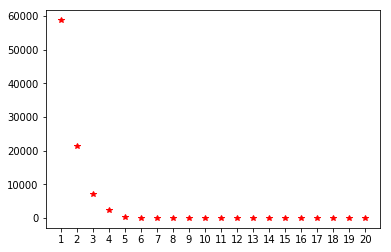

In [8]:
def clustering_1():
    X, y = make_blobs(n_samples=400, centers=random.randint(5, 10), center_box=(-15, 15),
                      cluster_std=0.5, random_state=33)
    
    # Task:
    # 1. for all `k` from 1 to sqrt(n_samles)=20 perform clustering and save inertia
    # 2. plot `inertia` vs `k` (k on x axis)
    # 3. choose "elbow value" of `k`
    # 4. plot original data (with y as `c` parameter's value)
    # 5. plot clustering results (each cluster should be of its own color)
    
    inertia = []
    k_vals = range(1, 21)
    for k in k_vals:
        kmeans = KMeans(n_clusters=k, random_state=RS)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    plt.plot(k_vals, inertia, 'r*')
    plt.xticks(ticks=k_vals, labels=k_vals)
    plt.show()
    
#     plt.scatter(X[:,0], X[:,1], c=y, cmap='plasma')
#     plt.title('Original data')
#     plt.show()
    
#     kmeans = KMeans(n_clusters=____, random_state=RS)
#     y_km = kmeans.fit_predict(X)
#     plt.scatter(X[:,0], X[:,1], c=y_km, cmap='rainbow')
#     plt.title('K-Means clustering')
#     plt.show()
    

clustering_1()

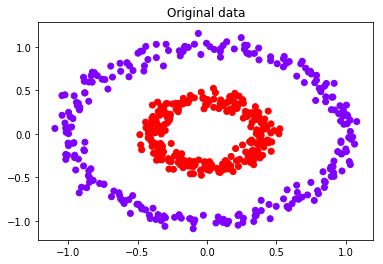

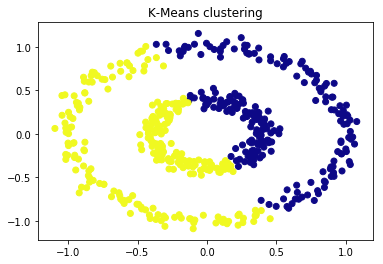

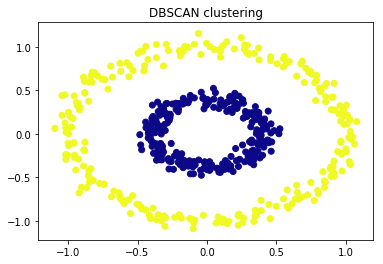

In [9]:
def clustering_2():
    X, y = make_circles(n_samples=500, noise=0.05, factor=0.4, random_state=RS)
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
    plt.title('Original data')
    plt.show()
    
    kmeans = KMeans(n_clusters=2, random_state=RS)
    y_km = kmeans.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_km, cmap='plasma')
    plt.title('K-Means clustering')
    plt.show()
    
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    y_db = dbscan.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_db, cmap='plasma')
    plt.title('DBSCAN clustering')
    plt.show()

clustering_2()